<a href="https://colab.research.google.com/github/sonaopt1991/sonap/blob/main/classificationassignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
df=pd.read_excel('/content/iris.xls')
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [72]:
df.shape

(150, 5)

In [73]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [75]:
df['Classification'].value_counts(normalize=True)#percentage occurance to check for bias

,proportion
Classification,
Iris-setosa,0.333333
Iris-versicolor,0.333333
Iris-virginica,0.333333


In [76]:
df.isnull().sum()

,0
SL,7
SW,6
PL,6
PW,0
Classification,0


Filling null values in SL,SW,PL

In [77]:
#tried to fill using median values but the filled value is very much different from the nearby values hence used interpolation method

In [78]:
df['SL']=df['SL'].interpolate(method='linear')#Filling missing values based on nearby datapoints
df['PL']=df['PL'].interpolate(method='linear')
df['SW']=df['SW'].interpolate(method='linear')

In [79]:
df.isnull().sum()

,0
SL,0
SW,0
PL,0
PW,0
Classification,0


In [80]:
df

,SL,SW,PL,PW,Classification
0,5.10,3.5,1.4,0.2,Iris-setosa
1,4.90,3.0,1.4,0.2,Iris-setosa
2,4.75,3.2,1.3,0.2,Iris-setosa
3,4.60,3.1,1.5,0.2,Iris-setosa
4,5.00,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.70,3.0,5.2,2.3,Iris-virginica
146,6.30,2.5,5.0,1.9,Iris-virginica
147,6.50,3.0,5.2,2.0,Iris-virginica
148,6.20,3.4,5.4,2.3,Iris-virginica


Handling outliers

<Axes: >

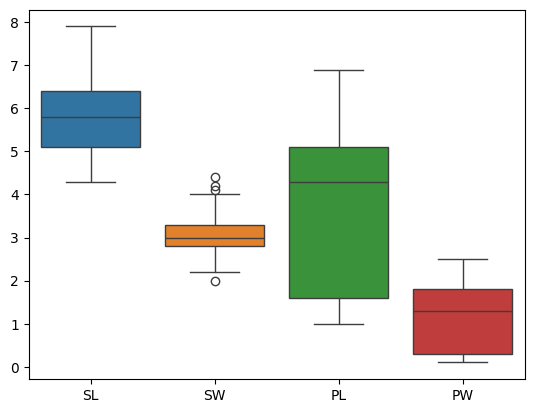

In [81]:
sns.boxplot(df)

In [82]:
#outlier in SW handle using IQR method
Q1=np.quantile(df['SW'],0.25)
Q3=np.quantile(df['SW'],0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [83]:
outlier = []
for x in df['SW']:
  if x>upper_limit or x<lower_limit:
    outlier.append(x)

In [84]:
ind = df[(df['SW'] > upper_limit) | (df['SW'] < lower_limit)].index


In [85]:
ind

Index([15, 32, 33, 60], dtype='int64')

In [86]:
df.drop([15, 32, 33, 60], inplace = True)

<Axes: ylabel='SW'>

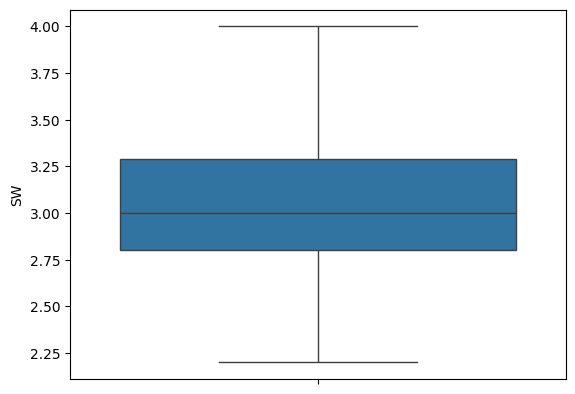

In [87]:
sns.boxplot(df['SW'])

Encoding categorical feature ,here classifictaion .
label encoder

In [88]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Classification']=le.fit_transform(df['Classification'])

In [89]:
df.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [90]:
#drop target variable classification
x=df.drop('Classification',axis=1)
y=df['Classification']

In [91]:
x.head()

,SL,SW,PL,PW
0,5.10,3.5,1.4,0.2
1,4.90,3.0,1.4,0.2
2,4.75,3.2,1.3,0.2
3,4.60,3.1,1.5,0.2
4,5.00,3.6,1.4,0.2


standard scaling

In [92]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [93]:
type(x)

numpy.ndarray

In [94]:
x=pd.DataFrame(x)

In [96]:
x.head()

,0,1,2,3
0,-0.916610,1.207779,-1.376239,-1.345899
1,-1.154415,-0.091674,-1.376239,-1.345899
2,-1.332770,0.428107,-1.433665,-1.345899
3,-1.511124,0.168217,-1.318814,-1.345899
4,-1.035513,1.467669,-1.376239,-1.345899


In [98]:
x.columns=['SL','SW','PL','PW']

In [99]:
x.head()

,SL,SW,PL,PW
0,-0.916610,1.207779,-1.376239,-1.345899
1,-1.154415,-0.091674,-1.376239,-1.345899
2,-1.332770,0.428107,-1.433665,-1.345899
3,-1.511124,0.168217,-1.318814,-1.345899
4,-1.035513,1.467669,-1.376239,-1.345899


In [100]:
x.describe()

,SL,SW,PL,PW
count,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02
mean,7.300097e-16,-1.946692e-16,3.406712e-16,-3.406712e-16
std,1.003442e+00,1.003442e+00,1.003442e+00,1.003442e+00
min,-1.867832e+00,-2.170798e+00,-1.605940e+00,-1.477867e+00
25%,-9.166099e-01,-6.114547e-01,-1.261389e+00,-1.213930e+00
50%,-8.429065e-02,-9.167370e-02,3.465181e-01,1.057556e-01
75%,6.291258e-01,6.555114e-01,7.484949e-01,7.655984e-01
max,2.412667e+00,2.507231e+00,1.782149e+00,1.689378e+00


Applying various classification algorithms

**1.logistic regression **

In [101]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [102]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [103]:
y_predict=lr.predict(x_test)

In [104]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [105]:
y_predict

array([0, 2, 0, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 1, 2, 0, 1, 2, 0, 1, 2, 2,
       0, 1, 0, 1, 1, 2, 2, 0])

In [106]:
print("Accuracy score:",accuracy_score(y_test,y_predict))
print("Precision score:",precision_score(y_test,y_predict,average='micro'))
print("Recall score:",recall_score(y_test,y_predict,average='micro'))
print("F1 score:",f1_score(y_test,y_predict,average='micro'))#average is used since target is multiclass

Accuracy score: 0.9666666666666667
Precision score: 0.9666666666666667
Recall score: 0.9666666666666667
F1 score: 0.9666666666666667


In [107]:
confusion_matrix(y_test,y_predict)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 10]])

**2**.**Naive** **bayes** **classifier**

In [108]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [109]:
y_pred1=nb.predict(x_test)

In [110]:
print("Accuracy score:",accuracy_score(y_test,y_pred1))
print("Precision score:",precision_score(y_test,y_pred1,average='micro'))
print("Recall score:",recall_score(y_test,y_pred1,average='micro'))
print("F1 score:",f1_score(y_test,y_pred1,average='micro'))#average is used since target is multiclass

Accuracy score: 0.9333333333333333
Precision score: 0.9333333333333333
Recall score: 0.9333333333333333
F1 score: 0.9333333333333333


In [111]:
confusion_matrix(y_test,y_pred1)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]])

***3***.**KNN**

In [112]:
from sklearn.neighbors import KNeighborsClassifier


In [113]:
metric_k=[]
neighbors=np.arange(3,15)#to find which is the optimum value of k

In [114]:
for k in neighbors:
  knn=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
  knn.fit(x_train,y_train)
  y_pred2=knn.predict(x_test)
  acc=accuracy_score(y_test,y_pred2)
  metric_k.append(acc)

In [115]:
metric_k

[0.9333333333333333,
 0.9,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9333333333333333,
 0.9333333333333333]

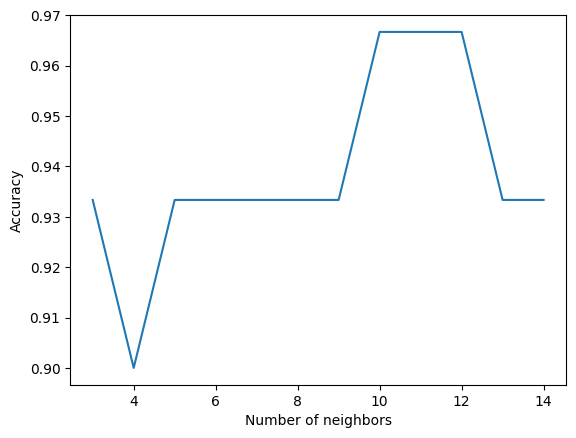

In [117]:
plt.plot(neighbors,metric_k)
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [118]:
knn=KNeighborsClassifier(n_neighbors=11,metric='euclidean')
knn.fit(x_train,y_train)
y_pred2=knn.predict(x_test)

In [119]:
print("Accuracy score:",accuracy_score(y_test,y_pred2))
print("Precision score:",precision_score(y_test,y_pred2,average='micro'))
print("Recall score:",recall_score(y_test,y_pred2,average='micro'))
print("F1 score:",f1_score(y_test,y_pred2,average='micro'))#average is used since target is multiclass


Accuracy score: 0.9666666666666667
Precision score: 0.9666666666666667
Recall score: 0.9666666666666667
F1 score: 0.9666666666666667


In [120]:
confusion_matrix(y_test,y_pred2)

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  1,  9]])

In [121]:
y_pred2

array([0, 2, 0, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 2, 2,
       0, 1, 0, 1, 1, 2, 2, 0])

**linear svm**

In [122]:
from sklearn.svm import SVC

In [123]:
svm_cls=SVC(kernel='linear')
svm_cls.fit(x_train,y_train)

SVC(kernel='linear')

In [124]:
y_pred3=svm_cls.predict(x_test)

In [125]:
print("Accuracy score:",accuracy_score(y_test,y_pred3))
print("Precision score:",precision_score(y_test,y_pred3,average='micro'))
print("Recall score:",recall_score(y_test,y_pred3,average='micro'))
print("F1 score:",f1_score(y_test,y_pred3,average='micro'))

Accuracy score: 0.9666666666666667
Precision score: 0.9666666666666667
Recall score: 0.9666666666666667
F1 score: 0.9666666666666667


In [126]:
confusion_matrix(y_test,y_pred3)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 10]])

**svm non linear**

In [127]:
svm_cls=SVC(kernel='rbf')
svm_cls.fit(x_train,y_train)

SVC()

In [128]:
y_pred4=svm_cls.predict(x_test)

In [129]:
print("Accuracy score:",accuracy_score(y_test,y_pred4))
print("Precision score:",precision_score(y_test,y_pred4,average='macro'))
print("Recall score:",recall_score(y_test,y_pred4,average='macro'))
print("F1 score:",f1_score(y_test,y_pred4,average='macro'))

Accuracy score: 0.9333333333333333
Precision score: 0.9249999999999999
Recall score: 0.9249999999999999
F1 score: 0.9249999999999999


In [130]:
y_pred4

array([0, 2, 0, 0, 0, 2, 0, 1, 2, 0, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 2, 2,
       0, 1, 0, 1, 1, 2, 2, 0])

In [131]:
confusion_matrix(y_test,y_pred4)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]])

**Decision tree**

In [132]:
from sklearn.tree import DecisionTreeClassifier

In [133]:
dt_cls=DecisionTreeClassifier()
dt_cls.fit(x_train,y_train)
y_pred5=dt_cls.predict(x_test)

In [134]:
y_pred5

array([0, 2, 0, 0, 0, 2, 0, 1, 2, 0, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 2, 2,
       0, 1, 0, 1, 1, 2, 2, 0])

In [135]:
print("Accuracy score:",accuracy_score(y_test,y_pred5))
print("Precision score:",precision_score(y_test,y_pred5,average='macro'))
print("Recall score:",recall_score(y_test,y_pred5,average='macro'))
print("F1 score:",f1_score(y_test,y_pred5,average='macro'))

Accuracy score: 0.9333333333333333
Precision score: 0.9249999999999999
Recall score: 0.9249999999999999
F1 score: 0.9249999999999999


In [136]:
confusion_matrix(y_test,y_pred5)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]])

**Random Forest**

In [137]:
from sklearn.ensemble import RandomForestClassifier

In [138]:
rf_cls=RandomForestClassifier()
rf_cls.fit(x_train,y_train)
y_pred6=rf_cls.predict(x_test)

In [139]:
y_pred6

array([0, 2, 0, 0, 0, 2, 0, 1, 2, 0, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 2, 2,
       0, 1, 0, 1, 1, 2, 2, 0])

In [140]:
confusion_matrix(y_test,y_pred6)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]])

In [141]:
print("Accuracy score:",accuracy_score(y_test,y_pred6))
print("Precision score:",precision_score(y_test,y_pred6,average='macro'))
print("Recall score:",recall_score(y_test,y_pred6,average='macro'))
print("F1 score:",f1_score(y_test,y_pred6,average='macro'))

Accuracy score: 0.9333333333333333
Precision score: 0.9249999999999999
Recall score: 0.9249999999999999
F1 score: 0.9249999999999999


**\Better accuracy is obtained for Logistic regression,  svm  linear  and KNN **